In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [3]:
#load Bank additional full file for analysis
data = pd.read_csv("C:/Users/fz8fd2/Downloads/test/Projects/Bank project/bank-additional/bank-additional-full_raj.csv")

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
data[data == 'unknown'].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
#convert marital status from categorical to numeric variable. As there are only 80 observations with unknown marital 
#status, we will remove those data points. Then use one hot encoder to change the categorical marital status to numeric

data = data[data["marital"].str.contains("unknown")==False]

df_temp = pd.get_dummies(data['marital'])

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['marital'], axis=1)

In [8]:
data

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,divorced,married,single
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
2,37,services,high.school,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
4,56,services,high.school,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,cellular,nov,fri,334,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0
41184,46,blue-collar,professional.course,no,no,no,cellular,nov,fri,383,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0
41185,56,retired,university.degree,no,yes,no,cellular,nov,fri,189,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0
41186,44,technician,professional.course,no,no,no,cellular,nov,fri,442,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0


In [9]:
data[['housing']].value_counts()

housing
yes        21541
no         18578
unknown      989
dtype: int64

In [10]:
#convert housing status from categorical to numeric variable. As there are only 989 observations with unknown housing status, 
# we will remove those data points. Then use get_dummies to change the categorical marital status to numeric
data = data[data["housing"].str.contains("unknown")==False]

df_temp = pd.get_dummies(data['housing'], prefix='housing', prefix_sep="_")

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['housing'], axis=1)

In [11]:
data[['loan']].value_counts()

loan
no      33883
yes      6236
dtype: int64

In [12]:
#Use get_dummies to change the categorical loan status to numeric
df_temp = pd.get_dummies(data['loan'], prefix='loan', prefix_sep="_")

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['loan'], axis=1)

In [13]:
data[['education']].value_counts()

education          
university.degree      11860
high.school             9281
basic.9y                5886
professional.course     5112
basic.4y                4054
basic.6y                2226
unknown                 1682
illiterate                18
dtype: int64

In [14]:
#want to keep the rows with unknown education as there are 1682 rows with unknown status. 
#Use get_dummies to change the categorical education status to numeric
df_temp = pd.get_dummies(data['education'], prefix='edu', prefix_sep="_")

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['education'], axis=1)

In [15]:
#Deleting the following columns 
# 1. contact-It is either through cell or tel. Someone having a term deposit,based on the  contact mechanism doesn't make sense
# 2. month - Same as above. There is no relation between last contact month and the person hving a term deposit
# 3. Day of the week  - Same as above
# 4. Duration - Same as above, although corelated with the dependent variable. It should not be considered for prediction.

data = data.drop(['contact'], axis=1)
data = data.drop(['month'], axis=1)
data = data.drop(['day_of_week'], axis=1)
data = data.drop(['duration'], axis=1)

In [16]:
data[['poutcome']].value_counts()

poutcome   
nonexistent    34651
failure         4128
success         1340
dtype: int64

In [17]:
#poutcome could be an indicator. It there was a positive, negative or no participation in the previous campaign. 
#Use get_dummies to change the categorical poutcome status to numeric

df_temp = pd.get_dummies(data['poutcome'], prefix='poutcome', prefix_sep="_")

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['poutcome'], axis=1)

In [18]:
data[['job']].value_counts()

job          
admin.           10181
blue-collar       9001
technician        6584
services          3862
management        2850
retired           1671
entrepreneur      1417
self-employed     1376
housemaid         1028
unemployed         982
student            851
unknown            316
dtype: int64

In [19]:
#convert job status from categorical to numeric variable. Use get_dummies to change the categorical job  to numeric
df_temp = pd.get_dummies(data['job'], prefix='job', prefix_sep="_")

data = pd.concat([data, df_temp], axis = 1)
data = data.drop(['job'], axis=1)

In [20]:
data[['default']].value_counts()

default
no         31757
unknown     8359
yes            3
dtype: int64

In [21]:
#Someone having defaulted on credit, should be a good indication as to whether they have term deposit. As they would more likely
#not default if there is a term deposit they have. However, we will not be able to use this data for prediction, as there is
#almost no data for 'yes' condition. Hence, dropping this column.

data = data.drop(['default'], axis=1)

In [22]:
data[['y']].value_counts()

y  
no     35598
yes     4521
dtype: int64

In [23]:
#Lets convert the y column which needs to be used for prediction to a numeric. no = 0, yes = 1
data['y'] = np.where(data['y'] == 'no', 0, 1)
data[['y']].value_counts()

y
0    35598
1     4521
dtype: int64

In [24]:
data.dtypes

age                          int64
campaign                     int64
pdays                        int64
previous                     int64
emp.var.rate               float64
cons.price.idx             float64
cons.conf.idx              float64
euribor3m                  float64
nr.employed                float64
y                            int32
divorced                     uint8
married                      uint8
single                       uint8
housing_no                   uint8
housing_yes                  uint8
loan_no                      uint8
loan_yes                     uint8
edu_basic.4y                 uint8
edu_basic.6y                 uint8
edu_basic.9y                 uint8
edu_high.school              uint8
edu_illiterate               uint8
edu_professional.course      uint8
edu_university.degree        uint8
edu_unknown                  uint8
poutcome_failure             uint8
poutcome_nonexistent         uint8
poutcome_success             uint8
job_admin.          

In [25]:
#Now all data has been cleansed. Lets split the data into training and test
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [26]:
y_train = train['y']
X_train = train.drop(['y'], axis=1)

In [27]:
y_test = test['y']
X_test = test.drop(['y'], axis=1)

In [28]:
#Logistic regression
#Scale the data 
scaler = StandardScaler()

#Select features using Logistic Regression
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))

lgr_pipe = Pipeline([
    ('scale', scaler),
    ('selector', extractor),
    ('lgr', LogisticRegression(random_state=42, max_iter=1000))
])

lgr_pipe.fit(X_train, y_train)

test_score = lgr_pipe.score(X_test, y_test)
train_score = lgr_pipe.score(X_train, y_train)

# Answer check
print('Train score : ')
print(train_score)
print('Test score : ')
print(test_score)

Train score : 
0.9003271537622682
Test score : 
0.893444666001994


In [29]:
#compare with baseline train and test score
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

#compared with baseline, our logistic model is performing a little better
#88.8% vs 90.3% in training set
#88.42% vs 89.34% in test

0    0.888082
1    0.111918
Name: y, dtype: float64
0    0.884222
1    0.115778
Name: y, dtype: float64


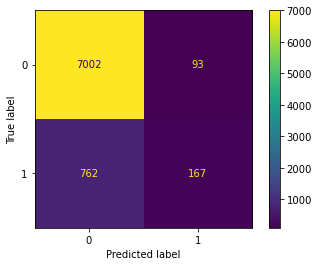

0.901854714064915
0.09814528593508501
0.6423076923076924
0.3576923076923077


In [30]:

predictions = lgr_pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

tn = 7002/(7002+762)
fn = 762/(7002+762)
tp = 167/(167+93)
fp = 93/(93+167)

print(tn)
print(fn)
print(tp)
print(fp)

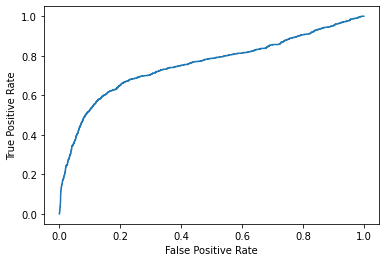

In [31]:
#ROC Curve
y_score = lgr_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

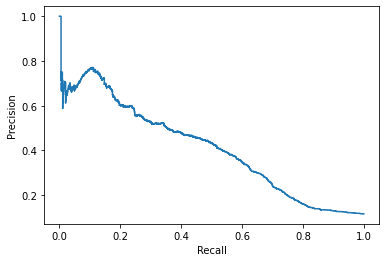

In [32]:
#Precision recall curve
prec, recall, _ = precision_recall_curve(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

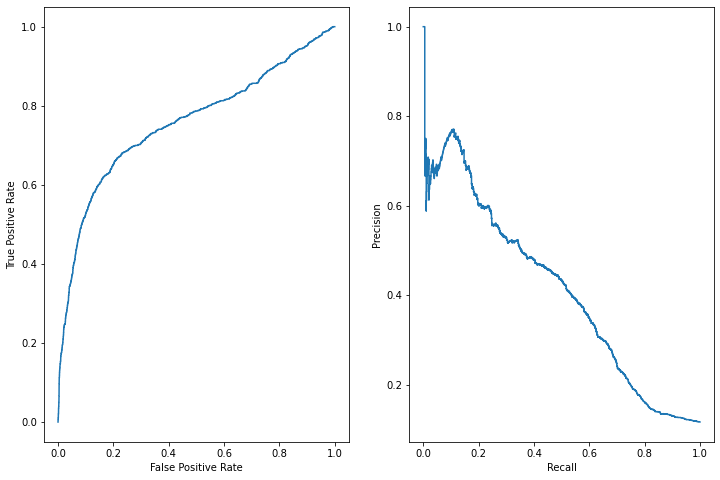

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [34]:
#next we will use KNearestNeighbors

kn_pipe = Pipeline([('knclassifer', KNeighborsClassifier())])

kn_params = {'knclassifer__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

kn_grid = GridSearchCV(kn_pipe, param_grid=kn_params)

kn_grid.fit(X_train, y_train)
print(kn_grid.best_estimator_)
print(kn_grid.best_params_)
print(accuracy_score(kn_grid.predict(X_test), y_test))

Pipeline(steps=[('knclassifer', KNeighborsClassifier(n_neighbors=20))])
{'knclassifer__n_neighbors': 20}
0.8935692921236291


In [39]:
#next we will use DecisionTree
scaler = StandardScaler()
d_pipe = Pipeline([
    ('scale', scaler),
    ('dtree', DecisionTreeClassifier())
])
    
dtree_params = {'dtree__max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

dtree_grid = GridSearchCV(d_pipe, param_grid=dtree_params)

dtree_grid.fit(X_train, y_train)
print(dtree_grid.best_estimator_)
print(dtree_grid.best_params_)
print(accuracy_score(dtree_grid.predict(X_test), y_test))

Pipeline(steps=[('scale', StandardScaler()),
                ('dtree', DecisionTreeClassifier(max_depth=2))])
{'dtree__max_depth': 2}
0.8945663010967099


In [40]:
#Dummy classifier for benchmarking purposes
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.8842223330009971


In [42]:
#SVC with default parameters
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

svc = SVC().fit(X_train_scaled, y_train)
svc_defaults = svc.score(X_test_scaled, y_test)

print(svc_defaults)

0.8944416749750748


In [ ]:
#took a very long time hence stopped it from running
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
          'gamma': [0.1, 1.0, 10.0, 100.0],}

grid = GridSearchCV(estimator=svc, param_grid=params).fit(X_train_scaled, y_train)
grid_score = grid.score(X_test_scaled, y_test)
best_kernel = grid.best_estimator_

print(grid_score)
print(best_kernel)

In [75]:
#lets now try to reduce the input params by using PCA

pca = PCA(n_components=25)
X_train_scaled = StandardScaler().fit_transform(X_train)
principalComponents = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(data = principalComponents)
print(pca.explained_variance_ratio_)

[0.12909883 0.065027   0.05432397 0.05274181 0.0494382  0.0476677
 0.04501223 0.04252366 0.0393639  0.0369311  0.03209051 0.03044276
 0.02935264 0.0283843  0.02697788 0.02678194 0.02626094 0.02604638
 0.02556723 0.02536775 0.02383399 0.02240084 0.02110292 0.02064414
 0.01822693]


In [63]:
#We will use KNearestNeighbors with PCA = 2
pca = PCA(n_components=2)
X_train_scaled = StandardScaler().fit_transform(X_train)
principalComponents = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(data = principalComponents)

kn_pipe1 = Pipeline([('knclassifer1', KNeighborsClassifier())])

kn_params1 = {'knclassifer1__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

kn_grid1 = GridSearchCV(kn_pipe1, param_grid=kn_params1)

kn_grid1.fit(X_train_pca, y_train)
print(kn_grid1.best_estimator_)
print(kn_grid1.best_params_)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)
print(accuracy_score(kn_grid1.predict(X_test_pca), y_test))

Pipeline(steps=[('knclassifer1', KNeighborsClassifier(n_neighbors=18))])
{'knclassifer1__n_neighbors': 18}
0.8915752741774676


In [64]:
#next we will use DecisionTree with PCA = 2
pca = PCA(n_components=2)
X_train_scaled = StandardScaler().fit_transform(X_train)
principalComponents = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(data = principalComponents)

d_pipe1 = Pipeline([('dtree1', DecisionTreeClassifier())])

dtree1_params = {'dtree1__max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

dtree1_grid = GridSearchCV(d_pipe1, param_grid=dtree1_params)

dtree1_grid.fit(X_train_pca, y_train)
print(dtree1_grid.best_estimator_)
print(dtree1_grid.best_params_)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

X_test_pca = pca.fit_transform(X_test_pca)
print(accuracy_score(dtree1_grid.predict(X_test_pca), y_test))

Pipeline(steps=[('dtree1', DecisionTreeClassifier(max_depth=3))])
{'dtree1__max_depth': 3}
0.8913260219341974


In [65]:
#SVC with default parameters and PCA = 2
pca = PCA(n_components=2)
X_train_scaled = StandardScaler().fit_transform(X_train)
principalComponents = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(data = principalComponents)

svc = SVC().fit(X_train_pca, y_train)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

svc_defaults = svc.score(X_test_pca, y_test)

print(svc_defaults)

0.8930707876370887


In [81]:
#Logistic regression with PCA = 2
#Scale the data 
scaler = StandardScaler()

lgr_pipe = Pipeline([
    ('lgr', LogisticRegression(random_state=42, max_iter=1000))
])

pca = PCA(n_components=2)
X_train_scaled = StandardScaler().fit_transform(X_train)
principalComponents = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(data = principalComponents)

lgr_pipe.fit(X_train_pca, y_train)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

train_score = lgr_pipe.score(X_train_pca, y_train)
test_score = lgr_pipe.score(X_test_pca, y_test)

# Answer check
print('Train score : ')
print(train_score)
print('Test score : ')
print(test_score)

Train score : 
0.8949992210624708
Test score : 
0.8916999002991027


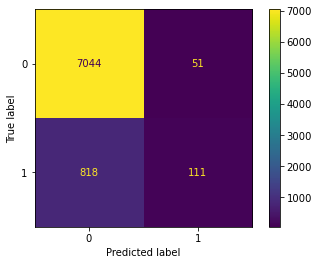

0.8959552276774357
0.10404477232256423
0.6851851851851852
0.3148148148148148


In [71]:
predictions = lgr_pipe.predict(X_test_pca)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

tn = 7044/(7044+818)
fn = 818/(7044+818)
tp = 111/(111+51)
fp = 51/(51+111)
print(tn)
print(fn)
print(tp)
print(fp)

In [33]:
#Further analysis of the data
data1 = pd.read_csv("C:/Users/fz8fd2/Downloads/test/Projects/Bank project/bank-additional/bank-additional-full_raj.csv")

In [34]:
data1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [37]:
data1['y'].value_counts()
#yes vs no samples are not balanced

no     36548
yes     4640
Name: y, dtype: int64

In [38]:
data1['education'].value_counts()
#illeterate samples are very low. Cannot produce any findings.

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [40]:
data1['housing'].value_counts()
#housing data is well balanced

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
#The following is the methodology I used
1. Loaded the data
2. Cleaned the data as per below:
    1. Checked what columns had "unknown" values.
    2. If number of unknows is too less, then got rid of those data points
    3. Converted categorical values to numeric using get_dummies() method
    4. Deleted columns that did not make sense to run the analysis, such as how the bank reached out to the customer, via 
    telephone or cellular, which day they reached out etc. These are not critical factors for someone to subscribe to a 
    term deposit
3. Once the data cleanup is completed, I created the train and test dataset. I used sklearn's train_test_split and split the
data into training (80%) and validation testing (20%). Since the data was ordered I shuffled it. I should have used stratify 
so that the data in train and test having comparable yes and no outcomes. However, I did not do that in my original run and 
didn't have the time to rerun with this parameter. But something that I would do in practice. 
4. Ran the analysis on training data and test data using 4 different classifiers. The following are the test scores.
    1. Logistic regression -  89.34% (tn - 90% and tp = 64%)
    2. KNearestNaighbors - 89.36%
    3. Decision Tree - 89.46%
    4. SVC - 89.44%
    5. Dummy - 88.42%
5. Since there were more than 35 features after I used get_dummies() on many categorical features, I used PCA to reduce the 
features.
    1. Found that 1st 10 pca components, were able to account for over 60% of the variance in data
    2. 1st 24 components, were able to account for over 85% of the variance in the data
6. Ran all the analysis once again using the principal components. For ease of use, I used only the top 2 PCA components. This 
should have only accounted for 20% of the variance, but I was very surprised with the results as they performed pretty closely
to using the whole dataset.
    1. Logistic regression - 89.17% (tn - 89.6% and tp = 68.5%)
    2. KNearestNaighbors - 89.16%
    3. Decision Tree - 89.13%
    4. SVC - 89.3%
    
Here are my learnings/findings

1. All types of classifiers yield pretty similar results. Although the output is similar, we need to consider the size of the 
data to determine, which approach may be suitable. 
2. SVC was very slow performing and Decision trees were very fast. KNearestNeighbor also was very computationally intensive
when the trying to compare with more neighbors.
3. Decision trees are very efficient in finding the optimal solution within a short depth. In my case, tree_depth was just 3,
where it found the optimal solution
4. PCA needs to be used, when there are more number of features and large data sets. In my case, even with 2 PCA components,
the results were very close to using the whole data set. Again the type of classifier did not make much difference in the results. 
All the classifiers scored approximately the same. Given the results were similar, it makes sense to use Decision trees as
they were very fast. SVC was the slowest. 
5. Although the models performed at 90% or so, even the dummy classifier performed at 88.5%, hence the models weren't that much more
smarter in classifying the data. I would get additional data and try to get a balance of 'yes' and 'no' outcome and then 
try out the model again to see if the dummy classifier goes down in scoring and our models predict at the same or better level.


